In [1]:
import pandas as pd

#local path of data from my computer - not all columns are included.
body = r"C:\Users\Suat\Documents\Programming\Data Science Project\data.csv"

df = pd.read_csv(body)
df.head()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
0,BROOKLYN,2015-11-23T10:29:49.000,DOOR/WINDOW,2015-11-07T10:16:55.000,397 1 STREET,11215.0,40.672571,-73.979307,1 STREET,Closed
1,MANHATTAN,2016-01-31T11:50:51.000,DOOR/WINDOW,2015-11-07T18:50:53.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
2,MANHATTAN,2015-11-20T09:11:31.000,DOOR/WINDOW,2015-11-07T23:09:57.000,3851 BROADWAY,10032.0,40.836272,-73.943274,BROADWAY,Closed
3,BROOKLYN,2015-11-16T12:25:46.000,DOOR/WINDOW,2015-11-07T14:05:52.000,1555 NOSTRAND AVENUE,11226.0,40.648298,-73.949293,NOSTRAND AVENUE,Closed
4,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,-73.835112,MULFORD AVENUE,Closed


In [2]:
#local path of data from my computer - not all columns are included.
body2 = r"C:\Users\Suat\Documents\Programming\Data Science Project\PLUTO_for_WEB\BX_18v1.csv"

df_bx = pd.read_csv(body2)
df_bx.head()

C:\Users\Suat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,NaN,209S016,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1


We have now both 311 dataset and BRONX dataset 

# QUESTION 3
Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

* For answering this question. First, we are going to work on 311 Dataset.
First We are going to choose only data where BOROUGH name is BRONX and make a new dataset.

In [3]:
bronx_df = df[df.borough == "BRONX"]
bronx_df.head()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
4,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,-73.835112,MULFORD AVENUE,Closed
6,BRONX,2015-11-13T11:19:29.000,DOOR/WINDOW,2015-11-06T16:36:34.000,2414 EAST TREMONT AVENUE,10461.0,40.842519,-73.852823,EAST TREMONT AVENUE,Closed
12,BRONX,2015-11-19T14:41:43.000,SAFETY,2015-11-06T11:09:30.000,488 EAST 163 STREET,10451.0,40.824408,-73.910024,EAST 163 STREET,Closed
13,BRONX,2015-11-06T11:40:01.000,HEAT/HOT WATER,2015-11-06T07:06:37.000,1505 TOWNSEND AVENUE,10452.0,40.842340,-73.915038,TOWNSEND AVENUE,Closed
14,BRONX,2015-11-07T01:08:51.000,HEAT/HOT WATER,2015-11-06T06:43:48.000,1390 PROSPECT AVENUE,10459.0,40.831536,-73.896778,PROSPECT AVENUE,Closed


In [4]:
##let's doublecheck
bronx_df["borough"].unique()

array(['BRONX'], dtype=object)

Now, we have a dataframe that only has incidents from BRONX.

Now there is more work, after 2010 HEATING incident is renamed as HEAT/HOT WATER incident. So we need to combine them.

In [5]:
import numpy as np
bronx_df['complaint_type'] = np.where(bronx_df['complaint_type']=='HEATING','HEAT/HOT WATER',bronx_df['complaint_type'])

C:\Users\Suat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
bronx_df["complaint_type"].value_counts()

HEAT/HOT WATER          543108
PLUMBING                167814
UNSANITARY CONDITION    118488
GENERAL CONSTRUCTION    107868
PAINT/PLASTER           103906
PAINT - PLASTER          79422
ELECTRIC                 69010
DOOR/WINDOW              58419
WATER LEAK               54263
NONCONST                 50599
FLOORING/STAIRS          39869
GENERAL                  35740
APPLIANCE                29182
SAFETY                   11727
ELEVATOR                  1467
OUTSIDE BUILDING          1441
CONSTRUCTION               871
STRUCTURAL                   4
AGENCY                       3
Name: complaint_type, dtype: int64

In [7]:
bronx_df.head()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
4,BRONX,2015-12-03T09:38:12.000,DOOR/WINDOW,2015-11-06T13:02:50.000,1808 MULFORD AVENUE,10461.0,40.847490,-73.835112,MULFORD AVENUE,Closed
6,BRONX,2015-11-13T11:19:29.000,DOOR/WINDOW,2015-11-06T16:36:34.000,2414 EAST TREMONT AVENUE,10461.0,40.842519,-73.852823,EAST TREMONT AVENUE,Closed
12,BRONX,2015-11-19T14:41:43.000,SAFETY,2015-11-06T11:09:30.000,488 EAST 163 STREET,10451.0,40.824408,-73.910024,EAST 163 STREET,Closed
13,BRONX,2015-11-06T11:40:01.000,HEAT/HOT WATER,2015-11-06T07:06:37.000,1505 TOWNSEND AVENUE,10452.0,40.842340,-73.915038,TOWNSEND AVENUE,Closed
14,BRONX,2015-11-07T01:08:51.000,HEAT/HOT WATER,2015-11-06T06:43:48.000,1390 PROSPECT AVENUE,10459.0,40.831536,-73.896778,PROSPECT AVENUE,Closed


Let's get the rows which has only HEAT/HOT WATER as an incident

In [8]:
bronx_df_HEAT = bronx_df[bronx_df.complaint_type == "HEAT/HOT WATER"]

In [9]:
bronx_df_HEAT.head()

,borough,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,longitude,street_name,status
13,BRONX,2015-11-06T11:40:01.000,HEAT/HOT WATER,2015-11-06T07:06:37.000,1505 TOWNSEND AVENUE,10452.0,40.842340,-73.915038,TOWNSEND AVENUE,Closed
14,BRONX,2015-11-07T01:08:51.000,HEAT/HOT WATER,2015-11-06T06:43:48.000,1390 PROSPECT AVENUE,10459.0,40.831536,-73.896778,PROSPECT AVENUE,Closed
189,BRONX,2015-11-09T17:24:18.000,HEAT/HOT WATER,2015-11-07T20:23:56.000,2995 BOTANICAL SQUARE,10458.0,40.867716,-73.881612,BOTANICAL SQUARE,Closed
192,BRONX,2015-11-08T12:52:50.000,HEAT/HOT WATER,2015-11-07T16:26:04.000,2351 GRAND CONCOURSE,10468.0,40.858889,-73.899100,GRAND CONCOURSE,Closed
205,BRONX,2015-11-11T01:11:15.000,HEAT/HOT WATER,2015-11-07T07:55:25.000,750 GRAND CONCOURSE,10451.0,40.823104,-73.924572,GRAND CONCOURSE,Closed


Now we have a dataset, named bronx_df_HEAT where it has all HEAT/HOT WATER incidents from BRONX

Let's work on PLUTO dataset about Bronx Houses
Firts let's select spesific colums that we are going to use.

In [10]:
df_bx_update = df_bx[["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR",
             "FacilFAR", "Lot", "LotArea", "LotDepth", "NumBldgs", "NumFloors", 
             "OfficeArea", "ResArea", "ResidFAR", "RetailArea", "YearBuilt", 
             "YearAlter1", "ZipCode", "YCoord", "XCoord"]]

In [11]:
df_bx_update.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


## Merging Two Datasets
For further analysis, we need to merge two dataset. I choose to merge them based on Adress, which gives me chance to analyze the house characteristic. To do that, we have to group both datasets by address and merge them.

We have bronx_df_HEAT dataset, which has incident_address column, let's see if any null variables

In [12]:
bronx_df_HEAT["incident_address"].isnull().sum()

1

In [13]:
#drop the row which has no incident_address
bronx_df_HEAT.dropna(subset = ["incident_address"], axis = 0, inplace=True)

C:\Users\Suat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
#check again and see we're clear with null
bronx_df_HEAT["incident_address"].isnull().sum()

0

In [15]:
#Now, let's see if there are multiple incidents in any address:
bronx_df_HEAT["incident_address"].value_counts()

3810 BAILEY AVENUE                7109
1025 BOYNTON AVENUE               5758
2090 EAST TREMONT AVENUE          3665
888 GRAND CONCOURSE               2959
2968 PERRY AVENUE                 2649
2074 WALLACE AVENUE               2445
1030 BOYNTON AVENUE               2349
266 BEDFORD PARK BOULEVARD        2134
750 GRAND CONCOURSE               1960
30 BUCHANAN PLACE                 1932
2040 BRONXDALE AVENUE             1840
1425 DR M L KING JR BOULEVARD     1737
957 WOODYCREST AVENUE             1674
3605 SEDGWICK AVENUE              1560
2410 WASHINGTON AVENUE            1553
2645 MORRIS AVENUE                1532
2856 WEBB AVENUE                  1493
116 EAST MOSHOLU PARKWAY SOUTH    1407
3555 BRUCKNER BOULEVARD           1326
2995 BOTANICAL SQUARE             1131
1381 CASTLE HILL AVENUE           1129
2955 GRAND CONCOURSE              1090
530 EAST 169 STREET               1033
223 NAPLES TERRACE                 962
2500 WEBB AVENUE                   942
1225 SHERIDAN AVENUE     

What we have found out is some addresses have more than one HEAT/HOT WATER incidents. We are gonig to analyze them later. Now what we need to do is make a new dataframe which has incident_address name and the number of incidents that has occured in that address.

In [16]:
bronx_address_amount_df = bronx_df_HEAT[["incident_address", "complaint_type"]]

In [17]:
bronx_address_amount_df.head()

,incident_address,complaint_type
13,1505 TOWNSEND AVENUE,HEAT/HOT WATER
14,1390 PROSPECT AVENUE,HEAT/HOT WATER
189,2995 BOTANICAL SQUARE,HEAT/HOT WATER
192,2351 GRAND CONCOURSE,HEAT/HOT WATER
205,750 GRAND CONCOURSE,HEAT/HOT WATER


In [18]:
grp = bronx_address_amount_df.groupby(["incident_address"])

In [19]:
grp.count().head()

,complaint_type
incident_address,
1 ADRIAN AVENUE,39
1 CAROLL STREET,18
1 DOROTHEA PLACE,1
1 EARHART LANE,2
1 EAST 198 STREET,22


In [20]:
type(grp.count())

pandas.core.frame.DataFrame

In [21]:
counted_bx = grp.count()

In [22]:
counted_bx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21683 entries, 1 ADRIAN AVENUE to 999A KELLY STREET
Data columns (total 1 columns):
complaint_type    21683 non-null int64
dtypes: int64(1)
memory usage: 338.8+ KB


Now I have a dataframe that has addresses as indexes and the amounts of HEAT/HOT WATER problems accurence amount. I want to chance the column name into complaint_amount.

In [23]:
counted_bx.columns = ["complaint_amount"]

In [24]:
counted_bx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21683 entries, 1 ADRIAN AVENUE to 999A KELLY STREET
Data columns (total 1 columns):
complaint_amount    21683 non-null int64
dtypes: int64(1)
memory usage: 338.8+ KB


Our dataframe is ready and name is counted_bx where indexes are address. Let's merge two dataframes based on address, before that, let's check quickly if there is any duplicated in df_bx_update dataframe

In [25]:
df_bx_update["Address"].value_counts().head()

SHORE DRIVE           42
PALISADE AVENUE       37
PARK AVENUE           35
WHITE PLAINS ROAD     35
BRUCKNER BOULEVARD    34
Name: Address, dtype: int64

In [26]:
df_bx_update["Address"].value_counts()

SHORE DRIVE                  42
PALISADE AVENUE              37
PARK AVENUE                  35
WHITE PLAINS ROAD            35
BRUCKNER BOULEVARD           34
MAJ WM DEEGAN BLVD           32
WEST 246 STREET              29
SEDGWICK AVENUE              27
POST ROAD                    22
3 AVENUE                     21
UNIVERSITY AVENUE            21
WESTCHESTER AVENUE           20
WEBSTER AVENUE               20
BRONX RIVER AVENUE           20
RANDALL AVENUE               19
BOSTON ROAD                  19
FIELDSTON ROAD               19
JEROME AVENUE                19
PAULDING AVENUE              18
CITY ISLAND AVENUE           18
CROSS BRONX EXPWY            18
BAYCHESTER AVENUE            18
INDEPENDENCE AVENUE          17
VAN NEST AVENUE              16
KING AVENUE                  16
CORNELL AVENUE               16
EAST TREMONT AVENUE          16
LAFAYETTE AVENUE             15
HEATH AVENUE                 15
LURTING AVENUE               15
                             ..
736 EAST

This is somethig we must handle before merge process. We need column for address names without repetition. Let's look at SHORE DRIVE that has 42 entries.

In [27]:
df_bx_update.loc[df_bx_update['Address'] == "SHORE DRIVE"]

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
79922,SHORE DRIVE,0,0.0,0.0,0.5,1.0,100,1348811,999.00,0,0.0,0,0,0.6,0,0,0,10465.0,NaN,NaN
79923,SHORE DRIVE,0,0.0,0.0,0.5,1.0,122,13,5.00,0,0.0,0,0,0.6,0,0,0,10465.0,242999.0,1035053.0
79924,SHORE DRIVE,0,0.0,0.0,0.5,1.0,123,24,4.00,0,0.0,0,0,0.6,0,0,0,10465.0,243003.0,1035052.0
80335,SHORE DRIVE,0,0.0,0.0,0.5,1.0,27,17000,110.00,0,0.0,0,0,0.6,0,0,0,10465.0,NaN,NaN
80489,SHORE DRIVE,0,0.0,0.0,0.5,1.0,174,18,7.08,0,0.0,0,0,0.6,0,0,0,10465.0,NaN,NaN
80508,SHORE DRIVE,0,0.0,0.0,0.5,1.0,54,27182,65.97,0,0.0,0,0,0.6,0,0,0,10465.0,241389.0,1035960.0
80509,SHORE DRIVE,0,0.0,0.0,0.5,1.0,74,6336,198.00,0,0.0,0,0,0.6,0,0,0,10465.0,NaN,NaN
80510,SHORE DRIVE,0,0.0,0.0,0.5,1.0,75,10098,198.00,0,0.0,0,0,0.6,0,0,0,10465.0,NaN,NaN
80511,SHORE DRIVE,0,0.0,0.0,0.5,1.0,76,17820,198.00,0,0.0,0,0,0.6,0,0,0,10465.0,241244.0,1036055.0
80512,SHORE DRIVE,0,0.0,0.0,0.5,1.0,79,7128,198.00,0,0.0,0,0,0.6,0,0,0,10465.0,241298.0,1036037.0


In [28]:
bronx_address_amount_df.loc[bronx_address_amount_df['incident_address'] == "EAST 213 STREET"]

,incident_address,complaint_type


I decide to drop all Address entries that has occured multiple times in df_bx_update

In [29]:
df_bx_update.drop_duplicates(subset="Address", keep=False, inplace=True)

C:\Users\Suat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_bx_update.loc[df_bx_update['Address'] == "SHORE DRIVE"]

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord


In [31]:
df_bx_update['Address'].value_counts().head()

2313 TENBROECK AVENUE    1
923 EAST 231 STREET      1
6039 LIEBIG AVENUE       1
1060 KELLY STREET        1
498 EAST 138 STREET      1
Name: Address, dtype: int64

Dropped all address values with multiple occurences. They are not houses (possibly)

In [32]:
#Any null entries?
df_bx_update["Address"].isnull().sum()

0

### FINALLY WE ARE READY FOR MERGING!!!!!
We are going to right merge counted_bx and df_bx_update based on counted_bx indexes and df_bx_update Address Line.

In [33]:
last_df = pd.merge(counted_bx, df_bx_update, left_index=True, right_on="Address", how="right")

In [34]:
last_df.head()

,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,NaN,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,NaN,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,NaN,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,2.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,...,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,13.0,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,...,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [35]:
last_df.head(30)

,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,NaN,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,...,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,NaN,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,...,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,NaN,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,...,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,2.0,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,...,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,13.0,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,...,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0
6,NaN,519 EAST 132 STREET,5316,100.00,0.61,5.0,6.5,34,8700,100.00,...,1.0,0,0,6.02,0,1931,0,10454.0,232055.0,1006046.0
7,NaN,517 EAST 132 STREET,14550,97.00,2.91,5.0,6.5,38,5000,100.00,...,3.0,0,0,6.02,0,1931,0,10454.0,232089.0,1005986.0
8,NaN,LINCOLN AVENUE,0,0.00,0.00,2.0,0.0,52,4200,50.00,...,0.0,0,0,0.00,0,0,0,10454.0,NaN,NaN
10,NaN,290 EAST 132 STREET,860,43.00,0.02,2.0,0.0,100,45053,76.58,...,1.0,0,0,0.00,0,1931,0,10454.0,233132.0,1003788.0
13,NaN,180 EAST 132 STREET,0,0.00,0.00,2.0,0.0,180,29530,72.58,...,0.0,0,0,0.00,0,0,0,10454.0,232365.0,1004938.0


In [36]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86348 entries, 0 to 89847
Data columns (total 21 columns):
complaint_amount    16585 non-null float64
Address             86348 non-null object
BldgArea            86348 non-null int64
BldgDepth           86348 non-null float64
BuiltFAR            86348 non-null float64
CommFAR             86348 non-null float64
FacilFAR            86348 non-null float64
Lot                 86348 non-null int64
LotArea             86348 non-null int64
LotDepth            86348 non-null float64
NumBldgs            86348 non-null int64
NumFloors           86348 non-null float64
OfficeArea          86348 non-null int64
ResArea             86348 non-null int64
ResidFAR            86348 non-null float64
RetailArea          86348 non-null int64
YearBuilt           86348 non-null int64
YearAlter1          86348 non-null int64
ZipCode             86331 non-null float64
YCoord              85459 non-null float64
XCoord              85459 non-null float64
dtypes:

Now, we found that we have 86348 addresses and 16585 of them called for HEAT/HOT WATER incident.

In [37]:
last_df["HOT/HEAT WATER"] = last_df["complaint_amount"]

In [38]:
last_df.head()

,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER
0,NaN,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,NaN
1,NaN,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,NaN
2,NaN,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,NaN
3,2.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,2.0
4,13.0,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,13.0


In [39]:
last_df["HOT/HEAT WATER"].replace(np.nan, 0.0, inplace = True)
 

In [40]:
last_df["HOT/HEAT WATER"].head()

0     0.0
1     0.0
2     0.0
3     2.0
4    13.0
Name: HOT/HEAT WATER, dtype: float64

In [41]:
last_df['HOT/HEAT WATER'] = np.where(last_df['HOT/HEAT WATER'] >  0, True, False)

In [42]:
last_df["HOT/HEAT WATER"].head()

0    False
1    False
2    False
3     True
4     True
Name: HOT/HEAT WATER, dtype: bool

last_df is now merged dataframe that has a column name HEAT/HOT WATER that defines if incident happened or not in that address

In [43]:
last_df["complaint_amount"].replace(np.nan, 0.0, inplace = True)

In [44]:
last_df.head()

,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER
0,0.0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,False
1,0.0,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False
2,0.0,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,False
3,2.0,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True
4,13.0,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,True


In [45]:
last_df.loc[last_df['YearBuilt'] == 0]

,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER
0,0.0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.00,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,False
8,0.0,LINCOLN AVENUE,0,0.0,0.00,2.0,0.0,52,4200,50.00,...,0,0,0.00,0,0,0,10454.0,NaN,NaN,False
13,0.0,180 EAST 132 STREET,0,0.0,0.00,2.0,0.0,180,29530,72.58,...,0,0,0.00,0,0,0,10454.0,232365.0,1004938.0,False
15,0.0,500 ST ANNS AVENUE,0,0.0,0.00,2.0,0.0,193,60839,150.00,...,0,0,0.00,0,0,0,10454.0,NaN,NaN,False
20,0.0,510 EAST 134 STREET,0,0.0,0.00,2.0,3.0,22,2500,100.00,...,0,0,3.00,0,0,0,10454.0,232480.0,1006105.0,False
30,0.0,139 BRUCKNER BOULEVARD,0,0.0,0.00,2.0,3.0,48,2500,100.00,...,0,0,3.00,0,0,0,10454.0,NaN,NaN,False
31,0.0,137 BRUCKNER BOULEVARD,0,0.0,0.00,2.0,3.0,49,2500,100.00,...,0,0,3.00,0,0,0,10454.0,NaN,NaN,False
32,0.0,135 BRUCKNER BOULEVARD,0,0.0,0.00,2.0,3.0,50,2525,100.00,...,0,0,3.00,0,0,0,10454.0,NaN,NaN,False
62,0.0,501 EAST 136 STREET,0,0.0,0.00,0.0,4.8,15,4000,100.00,...,0,0,2.43,0,0,0,10454.0,233117.0,1006296.0,False
96,0.0,514 EAST 139 STREET,0,0.0,0.00,0.0,4.8,9,3750,100.00,...,0,0,2.43,0,0,0,10454.0,NaN,NaN,False


In [46]:
import datetime as dt
today=dt.datetime.now().date()
last_df['YCoord']     =  last_df.YCoord.fillna('00.000').astype(float)
last_df['XCoord']    =  last_df.XCoord.fillna('00.000').astype(float) 
last_df.head(100)

,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER
0,0.0,122 BRUCKNER BOULEVARD,0,0.00,0.00,5.0,6.5,1,15000,200.00,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,False
1,0.0,126 BRUCKNER BOULEVARD,752,16.00,0.05,5.0,6.5,4,13770,100.00,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False
2,0.0,138 BRUCKNER BOULEVARD,39375,200.00,1.13,5.0,6.5,10,35000,200.00,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,False
3,2.0,144 BRUCKNER BOULEVARD,12500,85.00,5.00,5.0,6.5,17,2500,100.00,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True
4,13.0,148 BRUCKNER BOULEVARD,8595,70.00,4.58,5.0,6.5,18,1875,75.00,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,True
6,0.0,519 EAST 132 STREET,5316,100.00,0.61,5.0,6.5,34,8700,100.00,...,0,0,6.02,0,1931,0,10454.0,232055.0,1006046.0,False
7,0.0,517 EAST 132 STREET,14550,97.00,2.91,5.0,6.5,38,5000,100.00,...,0,0,6.02,0,1931,0,10454.0,232089.0,1005986.0,False
8,0.0,LINCOLN AVENUE,0,0.00,0.00,2.0,0.0,52,4200,50.00,...,0,0,0.00,0,0,0,10454.0,0.0,0.0,False
10,0.0,290 EAST 132 STREET,860,43.00,0.02,2.0,0.0,100,45053,76.58,...,0,0,0.00,0,1931,0,10454.0,233132.0,1003788.0,False
13,0.0,180 EAST 132 STREET,0,0.00,0.00,2.0,0.0,180,29530,72.58,...,0,0,0.00,0,0,0,10454.0,232365.0,1004938.0,False


In [47]:
last_df.isnull().sum()

complaint_amount     0
Address              0
BldgArea             0
BldgDepth            0
BuiltFAR             0
CommFAR              0
FacilFAR             0
Lot                  0
LotArea              0
LotDepth             0
NumBldgs             0
NumFloors            0
OfficeArea           0
ResArea              0
ResidFAR             0
RetailArea           0
YearBuilt            0
YearAlter1           0
ZipCode             17
YCoord               0
XCoord               0
HOT/HEAT WATER       0
dtype: int64

In [48]:
last_df['ZipCode']    =  last_df.ZipCode.fillna('00.000').astype(float)

In [49]:
last_df.isnull().sum()

complaint_amount    0
Address             0
BldgArea            0
BldgDepth           0
BuiltFAR            0
CommFAR             0
FacilFAR            0
Lot                 0
LotArea             0
LotDepth            0
NumBldgs            0
NumFloors           0
OfficeArea          0
ResArea             0
ResidFAR            0
RetailArea          0
YearBuilt           0
YearAlter1          0
ZipCode             0
YCoord              0
XCoord              0
HOT/HEAT WATER      0
dtype: int64

In [50]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86348 entries, 0 to 89847
Data columns (total 22 columns):
complaint_amount    86348 non-null float64
Address             86348 non-null object
BldgArea            86348 non-null int64
BldgDepth           86348 non-null float64
BuiltFAR            86348 non-null float64
CommFAR             86348 non-null float64
FacilFAR            86348 non-null float64
Lot                 86348 non-null int64
LotArea             86348 non-null int64
LotDepth            86348 non-null float64
NumBldgs            86348 non-null int64
NumFloors           86348 non-null float64
OfficeArea          86348 non-null int64
ResArea             86348 non-null int64
ResidFAR            86348 non-null float64
RetailArea          86348 non-null int64
YearBuilt           86348 non-null int64
YearAlter1          86348 non-null int64
ZipCode             86348 non-null float64
YCoord              86348 non-null float64
XCoord              86348 non-null float64
HOT/HEA

In [51]:
df_age = last_df[["complaint_amount", "YearBuilt"]]

In [52]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86348 entries, 0 to 89847
Data columns (total 2 columns):
complaint_amount    86348 non-null float64
YearBuilt           86348 non-null int64
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


In [53]:
df_age.head()

,complaint_amount,YearBuilt
0,0.0,0
1,0.0,1931
2,0.0,1931
3,2.0,1931
4,13.0,1920


In [54]:
#dropping 0's
df_age = df_age[df_age.YearBuilt != 0]

In [55]:
df_age["Age"] = 2019 - df_age["YearBuilt"]

In [56]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83143 entries, 1 to 89845
Data columns (total 3 columns):
complaint_amount    83143 non-null float64
YearBuilt           83143 non-null int64
Age                 83143 non-null int64
dtypes: float64(1), int64(2)
memory usage: 2.5 MB


In [57]:
df_age.head()

,complaint_amount,YearBuilt,Age
1,0.0,1931,88
2,0.0,1931,88
3,2.0,1931,88
4,13.0,1920,99
6,0.0,1931,88


In [58]:
import scipy.stats as stats

In [59]:
stats.pearsonr(df_age["complaint_amount"],df_age["Age"])

(0.03852068390065071, 1.1064496343866263e-28)

From the results, we see there is little correlation (0.038) between complaint amount and Age of the building. P value is less than 0.001 so there is strong certanity.

In [60]:
#looking for all pearson correlations
last_df.corr(method="pearson")

,complaint_amount,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER
complaint_amount,1.000000,0.071458,0.140934,0.146463,-0.007083,0.114994,-0.001121,0.003796,0.024196,-0.006518,...,-0.002013,0.083432,0.133834,0.007624,0.016619,0.059566,-0.000967,0.007532,0.003043,0.211875
BldgArea,0.071458,1.000000,0.251595,0.282479,0.043317,0.095249,0.080686,0.271776,0.310508,0.600347,...,0.228893,0.892771,0.087839,0.165496,0.021708,0.096482,0.004266,-0.003978,-0.002990,0.079337
BldgDepth,0.140934,0.251595,1.000000,0.265879,0.197150,0.280294,0.006221,0.057733,0.328900,0.069807,...,0.192160,0.139581,0.229826,0.207516,0.319348,0.264767,0.009594,0.087729,0.108388,0.257747
BuiltFAR,0.146463,0.282479,0.265879,1.000000,0.030932,0.258514,0.112895,-0.004659,-0.005842,0.093692,...,0.041216,0.274203,0.268368,0.349331,0.112425,0.145893,0.002116,0.022026,0.029097,0.269875
CommFAR,-0.007083,0.043317,0.197150,0.030932,1.000000,0.226466,0.006924,0.018106,0.102388,-0.008253,...,0.052836,-0.008635,0.065719,0.137442,-0.102417,0.124162,-0.010505,-0.075634,-0.042067,-0.017708
FacilFAR,0.114994,0.095249,0.280294,0.258514,0.226466,1.000000,-0.021662,-0.009952,-0.000472,-0.039393,...,0.042851,0.082269,0.850803,0.081278,-0.069171,0.175885,-0.019284,-0.067684,-0.036240,0.277630
Lot,-0.001121,0.080686,0.006221,0.112895,0.006924,-0.021662,1.000000,0.013290,0.039466,0.121134,...,0.019954,0.075042,-0.006766,0.080409,0.009117,-0.004019,0.001184,-0.006224,-0.048818,-0.003619
LotArea,0.003796,0.271776,0.057733,-0.004659,0.018106,-0.009952,0.013290,1.000000,0.358937,0.347003,...,0.108005,0.126797,-0.012168,0.025164,-0.002527,0.030944,0.001449,-0.022058,-0.023979,-0.002702
LotDepth,0.024196,0.310508,0.328900,-0.005842,0.102388,-0.000472,0.039466,0.358937,1.000000,0.234322,...,0.216593,0.180578,-0.018851,0.120356,-0.033132,0.090914,-0.023359,-0.046624,-0.045350,-0.000032
NumBldgs,-0.006518,0.600347,0.069807,0.093692,-0.008253,-0.039393,0.121134,0.347003,0.234322,1.000000,...,0.074037,0.508677,-0.043506,0.053765,0.117363,0.028187,0.014862,0.051559,0.058857,-0.008661


I've decided to make a new dataframe with sensible dataset with complaint_amount and rational house characteristics.

In [61]:
analyze_df = last_df[["complaint_amount","YearBuilt","BldgArea","BldgDepth","NumBldgs","NumFloors","OfficeArea"]]

Drop if YearBuilt == 0

In [62]:
analyze_df = analyze_df[analyze_df.YearBuilt != 0]

In [63]:
analyze_df

,complaint_amount,YearBuilt,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea
1,0.0,1931,752,16.00,2,1.0,272
2,0.0,1931,39375,200.00,1,2.0,0
3,2.0,1931,12500,85.00,1,5.0,0
4,13.0,1920,8595,70.00,1,5.0,0
6,0.0,1931,5316,100.00,2,1.0,0
7,0.0,1931,14550,97.00,1,3.0,0
10,0.0,1931,860,43.00,1,1.0,0
14,0.0,1967,98000,487.50,1,1.0,0
16,0.0,1963,3000,80.00,1,1.0,0
17,0.0,1931,41080,100.00,1,5.0,0


We should add age column and remove YearBuilt column

In [64]:
analyze_df["age"] = 2019 - analyze_df["YearBuilt"]

In [65]:
analyze_df.head()

,complaint_amount,YearBuilt,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea,age
1,0.0,1931,752,16.0,2,1.0,272,88
2,0.0,1931,39375,200.0,1,2.0,0,88
3,2.0,1931,12500,85.0,1,5.0,0,88
4,13.0,1920,8595,70.0,1,5.0,0,99
6,0.0,1931,5316,100.0,2,1.0,0,88


In [66]:
analyze_df.drop(["YearBuilt"], axis=1, inplace=True)

In [67]:
analyze_df.head()

,complaint_amount,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea,age
1,0.0,752,16.0,2,1.0,272,88
2,0.0,39375,200.0,1,2.0,0,88
3,2.0,12500,85.0,1,5.0,0,88
4,13.0,8595,70.0,1,5.0,0,99
6,0.0,5316,100.0,2,1.0,0,88


In [68]:
#let's check if there are any NaN
analyze_df.isnull().sum()

complaint_amount    0
BldgArea            0
BldgDepth           0
NumBldgs            0
NumFloors           0
OfficeArea          0
age                 0
dtype: int64

In [69]:
analyze_df.corr(method="pearson")

,complaint_amount,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea,age
complaint_amount,1.000000,0.071158,0.142259,-0.008989,0.224869,-0.002180,0.038521
BldgArea,0.071158,1.000000,0.259427,0.603890,0.378481,0.228962,-0.023715
BldgDepth,0.142259,0.259427,1.000000,0.032773,0.296440,0.200371,0.026648
NumBldgs,-0.008989,0.603890,0.032773,1.000000,0.055692,0.073738,0.039164
NumFloors,0.224869,0.378481,0.296440,0.055692,1.000000,0.070736,-0.059168
OfficeArea,-0.002180,0.228962,0.200371,0.073738,0.070736,1.000000,-0.013410
age,0.038521,-0.023715,0.026648,0.039164,-0.059168,-0.013410,1.000000


In [70]:
#let's see if anything changes when we drop addresses with 0 complaints.
analyze_df2 = analyze_df[analyze_df.complaint_amount != 0]

In [71]:
analyze_df2.head()

,complaint_amount,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea,age
3,2.0,12500,85.0,1,5.0,0,88
4,13.0,8595,70.0,1,5.0,0,99
28,92.0,11500,96.0,1,5.0,0,94
45,1.0,2080,52.0,1,2.0,0,19
46,1.0,2080,52.0,1,2.0,0,19


In [72]:
analyze_df2.corr(method="pearson")

,complaint_amount,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea,age
complaint_amount,1.000000,0.155771,0.192782,-0.019668,0.233317,-0.004763,0.033969
BldgArea,0.155771,1.000000,0.425010,0.506601,0.561528,0.404568,-0.077236
BldgDepth,0.192782,0.425010,1.000000,0.015527,0.459991,0.227170,0.084880
NumBldgs,-0.019668,0.506601,0.015527,1.000000,-0.003618,0.258938,0.015561
NumFloors,0.233317,0.561528,0.459991,-0.003618,1.000000,0.061432,-0.096294
OfficeArea,-0.004763,0.404568,0.227170,0.258938,0.061432,1.000000,-0.016871
age,0.033969,-0.077236,0.084880,0.015561,-0.096294,-0.016871,1.000000


strongest correlation between complaint_amount and building characteristics is NumFloors, which is Number of Floors.

In [73]:
import matplotlib.pyplot as plt
plt.scatter(analyze_df["NumFloors"], analyze_df["complaint_amount"],label="Luck")
plt.show()

<Figure size 640x480 with 1 Axes>

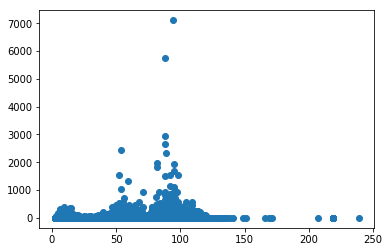

In [74]:
plt.scatter(analyze_df["age"], analyze_df["complaint_amount"],label="Luck")
plt.show()

Remove two outliers over 4000 complaints

In [75]:
#remove those outliers
analyze_df3 = analyze_df[analyze_df.complaint_amount <  4000]

In [76]:
analyze_df3.corr(method="pearson")

,complaint_amount,BldgArea,BldgDepth,NumBldgs,NumFloors,OfficeArea,age
complaint_amount,1.000000,0.089423,0.179364,-0.011060,0.283157,-0.002654,0.047855
BldgArea,0.089423,1.000000,0.259412,0.603897,0.378467,0.228964,-0.023724
BldgDepth,0.179364,0.259412,1.000000,0.032779,0.296397,0.200376,0.026633
NumBldgs,-0.011060,0.603897,0.032779,1.000000,0.055703,0.073738,0.039166
NumFloors,0.283157,0.378467,0.296397,0.055703,1.000000,0.070742,-0.059198
OfficeArea,-0.002654,0.228964,0.200376,0.073738,0.070742,1.000000,-0.013409
age,0.047855,-0.023724,0.026633,0.039166,-0.059198,-0.013409,1.000000


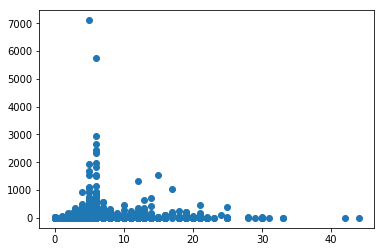

In [77]:
plt.scatter(analyze_df["NumFloors"], analyze_df["complaint_amount"])
plt.show()

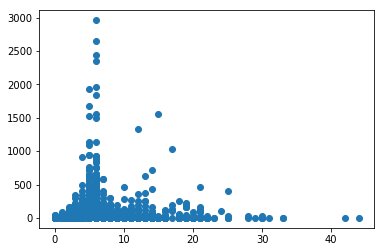

In [78]:
plt.scatter(analyze_df3["NumFloors"], analyze_df3["complaint_amount"])
plt.show()

## RANDOM FOREST ALGORITHM

In [79]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86348 entries, 0 to 89847
Data columns (total 22 columns):
complaint_amount    86348 non-null float64
Address             86348 non-null object
BldgArea            86348 non-null int64
BldgDepth           86348 non-null float64
BuiltFAR            86348 non-null float64
CommFAR             86348 non-null float64
FacilFAR            86348 non-null float64
Lot                 86348 non-null int64
LotArea             86348 non-null int64
LotDepth            86348 non-null float64
NumBldgs            86348 non-null int64
NumFloors           86348 non-null float64
OfficeArea          86348 non-null int64
ResArea             86348 non-null int64
ResidFAR            86348 non-null float64
RetailArea          86348 non-null int64
YearBuilt           86348 non-null int64
YearAlter1          86348 non-null int64
ZipCode             86348 non-null float64
YCoord              86348 non-null float64
XCoord              86348 non-null float64
HOT/HEA

Now let us divide the number of complaints to 4 ranges -
a) 0 (No Complaint), b) 1 (Number of Complaints between 1 to 10) c) 10 (Number of Complaints between 11 to 100) and d) 100 (Number of Complaints above 100)

In [80]:
def cnt_range(cnt):
    if cnt <= 0:
        rng = 0
    elif cnt <= 10 and cnt > 0:
        rng = 1
    elif cnt <= 100 and cnt > 10:
        rng = 10
    elif cnt > 100:
        rng = 100
    else:
        rng = 10
    return rng

In [81]:
last_df['complaint_range'] = last_df['complaint_amount'].apply(lambda x: cnt_range(x))
last_df.shape

(86348, 23)

In [82]:
last_df.groupby(['complaint_range']).count()

,complaint_amount,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,HOT/HEAT WATER
complaint_range,,,,,,,,,,,,,,,,,,,,,
0,69763,69763,69763,69763,69763,69763,69763,69763,69763,69763,...,69763,69763,69763,69763,69763,69763,69763,69763,69763,69763
1,11092,11092,11092,11092,11092,11092,11092,11092,11092,11092,...,11092,11092,11092,11092,11092,11092,11092,11092,11092,11092
10,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,...,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
100,973,973,973,973,973,973,973,973,973,973,...,973,973,973,973,973,973,973,973,973,973


In [83]:
last_df["Age"] = 2019 - last_df["YearBuilt"]

In [84]:
last_df["Age"].unique()

array([2019,   88,   99,   52,   56,   46,   35,  104,   29,   16,   94,
        113,   63,   19,   18,  119,  110,   98,   74,  114,   21,  109,
         14,   26,  112,   58,   84,   15,   17,   62,  118,   55,   49,
         47,   43,   27,   59,  122,   67,   23,   25,  101,   22,  106,
         68,   95,   93,   92,  128,  120,   13,  129,   33,   87,   45,
         96,   12,   36,   44,    6,   53,  115,  116,  117,    2,    4,
         24,   86,   11,   28,   50,    3,  130,  131,  132,   89,  107,
          9,   10,   38,   57,   54,  139,   83,   64,   61,    7,  124,
        133,   30,   81,   79,   91,  108,  102,   65,   31,   69,  105,
          8,  111,   90,   60,   41,    5,   48,   78,  123,   66,   72,
         71,   97,   70,  100,   40,   39,   82,  103,   75,  219,   20,
         42,   76,   51,   32,   85,   37,   80,   77,   34,   73,  121,
        169,  127,  207,  239,  135,  166,  134,  136,  141,  170,  151,
        149,  126,  171], dtype=int64)

In [85]:
last_df = last_df[last_df["Age"] != 2019]

In [86]:
last_df["Age"].unique()

array([ 88,  99,  52,  56,  46,  35, 104,  29,  16,  94, 113,  63,  19,
        18, 119, 110,  98,  74, 114,  21, 109,  14,  26, 112,  58,  84,
        15,  17,  62, 118,  55,  49,  47,  43,  27,  59, 122,  67,  23,
        25, 101,  22, 106,  68,  95,  93,  92, 128, 120,  13, 129,  33,
        87,  45,  96,  12,  36,  44,   6,  53, 115, 116, 117,   2,   4,
        24,  86,  11,  28,  50,   3, 130, 131, 132,  89, 107,   9,  10,
        38,  57,  54, 139,  83,  64,  61,   7, 124, 133,  30,  81,  79,
        91, 108, 102,  65,  31,  69, 105,   8, 111,  90,  60,  41,   5,
        48,  78, 123,  66,  72,  71,  97,  70, 100,  40,  39,  82, 103,
        75, 219,  20,  42,  76,  51,  32,  85,  37,  80,  77,  34,  73,
       121, 169, 127, 207, 239, 135, 166, 134, 136, 141, 170, 151, 149,
       126, 171], dtype=int64)

In [87]:
new_df_analyze = last_df[['BldgArea', 'BldgDepth', 'BuiltFAR',
       'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs',
       'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'ZipCode', 'YCoord', 'XCoord',
       'complaint_range', 'Age']]


In [88]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [89]:
from sklearn.model_selection import train_test_split
datas = new_df_analyze.columns.tolist()
response = 'complaint_range'
datas.remove(response)

X = new_df_analyze[datas]
y = new_df_analyze[response]

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clsfRF = RandomForestClassifier(n_estimators=100, random_state=5)
pipeRFC = Pipeline(steps=[('scaler', scaler), ('classification', clsfRF)])

In [91]:
pipeRFC.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('classification', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min...stimators=100, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False))])

In [92]:
model = pipeRFC.steps[1][1]
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [93]:
total_importance = sum(model.feature_importances_)
col_names = X.columns.tolist()
feat_importance = model.feature_importances_

most_imp_ml_features = pd.DataFrame()
most_imp_ml_features['name'] = col_names
most_imp_ml_features['importance'] = feat_importance
most_imp_ml_features['percentage_importance'] = most_imp_ml_features['importance'].apply(lambda x: 1.0 * x / total_importance)

print(most_imp_ml_features.percentage_importance.sum())

1.0


In [94]:
most_imp_ml_features = most_imp_ml_features.sort_values(by='importance',ascending=False)
most_imp_ml_features[['name','percentage_importance']].head(20)

,name,percentage_importance
11,ResArea,0.129694
16,XCoord,0.104243
15,YCoord,0.101595
2,BuiltFAR,0.098151
5,Lot,0.093490
0,BldgArea,0.077969
1,BldgDepth,0.066266
9,NumFloors,0.065191
6,LotArea,0.064031
17,Age,0.053606


## XGBoost Algorithm

In [95]:
!pip install xgboost==0.80

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [96]:
from xgboost import XGBRegressor
regXGBC = XGBRegressor(observation = 'multi:softmax')
pipeXGBC = Pipeline(steps=[('scaler', scaler), ('regression', regXGBC)])

In [97]:
pipeXGBC.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('regression', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_... reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1))])

In [98]:
modelXGB = pipeXGBC.steps[1][1]
modelXGB

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear',
       observation='multi:softmax', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [99]:
total_importanceXGB = sum(modelXGB.feature_importances_)
col_names = X.columns.tolist()
feat_importance = modelXGB.feature_importances_

most_imp_ml_features = pd.DataFrame()
most_imp_ml_features['name'] = col_names
most_imp_ml_features['importance'] = feat_importance
most_imp_ml_features['percentage_importance'] = most_imp_ml_features['importance'].apply(lambda x: 1.0 * x / total_importanceXGB)

print(most_imp_ml_features.percentage_importance.sum())

0.9999999999999999


In [100]:
most_imp_ml_features = most_imp_ml_features.sort_values(by='importance',ascending=False)
most_imp_ml_features[['name','percentage_importance']].head(20)

,name,percentage_importance
11,ResArea,0.302360
2,BuiltFAR,0.140118
17,Age,0.103245
1,BldgDepth,0.073746
0,BldgArea,0.057522
7,LotDepth,0.054572
16,XCoord,0.054572
15,YCoord,0.045723
9,NumFloors,0.041298
5,Lot,0.036873


Now we can see the relationship via Random Forest and XGBoost algorithm 

# Concluding Remarks
According to Pearson Correlation, there is some relationship between Number of Floors and Complaint Amount by address. I cannot find any very strong correlation (over 0.5 let's say) between Complaint Amount and house characteristics
According to Random Forest and XGBoost Algorithms, there are some relationship exist with ResArea, BuiltFar, Age, XCoord, YCoord and Lot. XCoord, YCoord and Lot are not building Characteristic so we don't use them and we are going to build a predictive model based on ResArea, BuiltFar, Age and NumFloor, BldgArea and BldgDepth.